In [1]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint

from sheet_id.models.FCN import FCN
from sheet_id.utils.loss_functions import softmax_sparse_crossentropy_ignoring_background, softmax_sparse_crossentropy
from sheet_id.utils.metrics import sparse_accuracy_ignoring_background, sparse_accuracy
from sheet_id.utils.dataPreprocessing import splitTrainValidation
from sheet_id.utils.dataGenerator import DataGenerator

import matplotlib.pyplot as plt
import numpy as np

/home/mirlab/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Training

In [2]:
model = FCN(input_shape=(250,250,1), n_classes=124)

In [3]:
loss_fn = softmax_sparse_crossentropy
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, 
                 epsilon=1e-8, decay=0.0, amsgrad=False)
metrics = [sparse_accuracy]
model.compile(loss=loss_fn, optimizer=optimizer, metrics=metrics)

In [4]:
callbacks = []

In [5]:
train_partition, validation_partition = splitTrainValidation('../data/', max_size=200, test_size=20, npy_only=True)

In [6]:
params = {'dim': (250,250),
          'batch_size': 20,
          'n_classes': 124,
          'n_channels': 1,
          'shuffle': True,
          'crop': True,
          'crop_size': (250,250),
          'load_npy': True}
training_generator = DataGenerator(train_partition, **params)
validation_generator = DataGenerator(validation_partition, **params)

In [7]:
history = model.fit_generator(generator=training_generator, epochs=20,
                              validation_data=validation_generator,
                              use_multiprocessing=True, workers=10,
                              callbacks=callbacks,
                              steps_per_epoch=10)

Epoch 1/20
10/10 [==============================] - 86s 9s/step - loss: 3.2013 - sparse_accuracy: 0.6687 - val_loss: 0.2164 - val_sparse_accuracy: 0.9810
Epoch 2/20
10/10 [==============================] - 14s 1s/step - loss: 0.1458 - sparse_accuracy: 0.9877 - val_loss: 0.1853 - val_sparse_accuracy: 0.9866
Epoch 3/20
10/10 [==============================] - 14s 1s/step - loss: 0.1289 - sparse_accuracy: 0.9858 - val_loss: 0.1282 - val_sparse_accuracy: 0.9860
Epoch 4/20
10/10 [==============================] - 14s 1s/step - loss: 0.0795 - sparse_accuracy: 0.9884 - val_loss: 0.0961 - val_sparse_accuracy: 0.9893
Epoch 5/20
10/10 [==============================] - 14s 1s/step - loss: 0.0759 - sparse_accuracy: 0.9868 - val_loss: 0.0775 - val_sparse_accuracy: 0.9907
Epoch 6/20
10/10 [==============================] - 14s 1s/step - loss: 0.0676 - sparse_accuracy: 0.9889 - val_loss: 0.0787 - val_sparse_accuracy: 0.9883
Epoch 7/20
10/10 [==============================] - 14s 1s/step - loss: 0.07

# Visualization

In [8]:
example_img, example_annotation = training_generator[0]

In [9]:
model.evaluate(example_img, example_annotation)

20/20 [==============================] - 0s 25ms/step


[0.06838394701480865, 0.988102376461029]

In [10]:
prediction = model.predict(example_img)
prediction = np.argmax(prediction, axis=-1)
prediction.shape

(20, 250, 250)

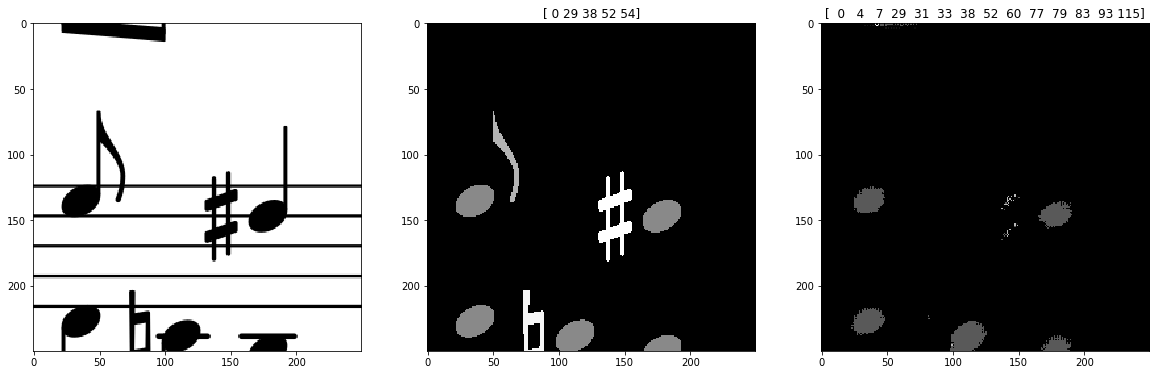

In [21]:
img_id = 2
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(example_img[img_id,:,:,0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(example_annotation[img_id,:,:,0], cmap='gray')
plt.title(np.unique(example_annotation[img_id,:,:,0]))
plt.subplot(1,3,3)
plt.imshow(prediction[img_id,:,:], cmap='gray')
plt.title(np.unique(prediction))
plt.show()